### Import packages

In [640]:
import pandas as pd
import numpy as np
import zipfile
import os
import openpyxl
import matplotlib.pyplot as plt
import folium
from collections import defaultdict
import random
from IPython.display import display, HTML


### script to extract the zip file in the current directory

- I may go back and make this more robust - the script parses my current directory, assesses whether a file is a zip file or not and then unzips all elements in it. Lastly I clean up by removing the .zip file from my directory. 
<br/> This currently only works:
- I wrote this to work in a user's current directory, you'd want to use it where you clone a repo that contains a .zip file.
- I found information on the listdir() call here [Geeks for Geeks article](https://www.geeksforgeeks.org/python-os-listdir-method/)
- These were usefule as well [zipfile docs](https://docs.python.org/3/library/zipfile.html)

In [411]:
# this script will unpack a .zip file into the current directory. It will not alter non .zip files. It will later on remove the .zip file after everything is opened
def unpack_zips():
    # this will loop over every file in the current directory 
    for filename in os.listdir():
        #if the item is a .zip file
        if zipfile.is_zipfile(filename):
            # .xlsx are a fun zipped file...... don't want to unpack thi. just skip
            if filename.split('.')[-1] == 'xlsx':
                pass
                print(str(filename) + " is not a zipped file.")
            else:
                # when we encounter a .zip - state the items are unpacked and the file is deleted
                print("beginning extraction of " + str(filename))
                zip_file = zipfile.ZipFile(filename)
                # extract those files from the .zip object and place them . - or right here where we are - listdir() pythonically speaking
                zip_file.extractall()
                # when we encounter a .zip - state the items are unpacked and the file is deleted
                print('Done extracting all elements of ' + str(filename) + " and removing " + str(filename))
                # once the .zip files are unpacked, remove the .zip file - we no longer need it :)
                os.remove(filename)
        else:
            # if the first characater in the filename is non alphanumeric, then skip it.
            if filename[0].isalnum() == 0:
                pass
            # if the file doesn't meet our rules, return 'x is not a zipped file'.
            else:
                pass
                print(str(filename) + " is not a zipped file.")

### unpack the zipped files

In [412]:
unpack_zips()

docProps is not a zipped file.
Tickets.csv is not a zipped file.
hr_data_analyst_BillPetrosino.ipynb is not a zipped file.
Airport_Codes.csv is not a zipped file.
word is not a zipped file.
Flights.csv is not a zipped file.
my_plot.png is not a zipped file.
Airline_Challenge_Metadata.xlsx is not a zipped file.
data_analyst_metadata_BillPetrosino.xlsx is not a zipped file.


### script to create dataframes from all the .csv and .xlsx file

- This script will loop over all the .csv and .xlsx files in the current directory.
<br/> It will then:
    - create global variables for each dataframe 
    - ouput the names of all the dataframes created
    - I needed a reminder on the globals() feature and got that information from [Real Python article](https://realpython.com/python-use-global-variable-in-function/#:~:text=globals()%20function.-,The%20globals()%20Function,variable%20from%20within%20your%20functions)
    - I found information on the listdir() call here [Geeks for Geeks article](https://www.geeksforgeeks.org/python-os-listdir-method/)

In [413]:
def create_df():
    global dfs
    global meta_data    #this will show all text in a col, not limit the text in jupyter
    pd.set_option('display.max_colwidth', None)
    #list of all dataframes created here
    dfs = []
    meta_data = []
    #this loops over all the files in the current directory - or os.listdir()
    for filename in os.listdir():
        #this then will run the following commands on a .csv file
        if filename.split('.')[-1] == 'csv':
            #the file name will be the name of the file, before the file type, in lowercase
            file = filename.split('.')[0].lower()  
            #here we create a global use variabe of the file variabkle from above
            globals()[file] = pd.read_csv(filename,low_memory=False)
            if file.split('_')[-1]=='metadata':
                 meta_data.append(file)
            #we append the name of each .xlsx file to our list dfs
            else:
                #we append the name of each .csv file to our list dfs
                dfs.append(file)
            dfs.sort()
            meta_data.sort()
        #this then will run the following commands on an .xlsx file
        if filename.split('.')[-1] == 'xlsx':
            xlsx = pd.ExcelFile(filename)
            file_sheets = xlsx.sheet_names
            for sheet in file_sheets:
                df = pd.read_excel(filename, sheet)
                file = sheet.lower().replace(' ','_')
                globals()[file] = pd.read_excel(filename, sheet)
                if file.split('_')[-1]=='metadata':
                    meta_data.append(file)
                #we append the name of each .xlsx file to our list dfs
                else:
                    dfs.append(file)
            dfs.sort()
            meta_data.sort()
    return 'Look into this meta data first: ' + ', '.join(meta_data) +'. ' + "I have created the following dataframes: " + ', '.join(dfs) + '.'

### create the dataframes

In [414]:
create_df()

'Look into this meta data first: airport_codes_metadata, dataset_metadata, flights_metadata, tickets_metadata. I have created the following dataframes: airport_codes, flights, sheet1, tickets.'

### look into the metadata

In [415]:
dataset_metadata

,Dataset Name,Description
0,Airport_Codes,"Information on airports and includes airport code, city, country, and coordinates"
1,Flights,"Flights data for Q1 2019 and includes date, origin, destination, distance, flight number, and occupancy rate"
2,Tickets,Sample tickets data for Q1 2019 and includes itinerary details and fare information. Consider round trips only for your analysis.


In [416]:
airport_codes_metadata

,Field Name,Description
0,TYPE,"The type of the airport, valid value like: small_airport, medium_airport, heliport, etc."
1,NAME,The name of the airport
2,ELEVATION_FT,Elevation of the airport from the sea level
3,CONTINENT,The continent airport belongs to
4,ISO_COUNTRY,The country of the airport
5,MUNICIPALITY,The city or town of the airport
6,IATA_CODE,"An airport code is a three-letter geocode designating many airports and metropolitan areas around the world, defined by the International Air Transport Association (IATA)."
7,COORDINATES,Longitude and latitude coordinates of the airport


In [417]:
flights_metadata

,Field Name,Description
0,FL_DATE,Flight Date (yyyy-mm-dd)
1,OP_CARRIER,Operating commercial carrier Flight code
2,TAIL_NUM,Tail Number is the aircraft registration number for the aircraft used (similar to VIN number for cars).
3,OP_CARRIER_FL_NUM,Operating commercial carrier Flight number
4,ORIGIN_AIRPORT_ID,"Origin Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport."
5,ORIGIN,"Origin Airport, International Air Transport Association (IATA) Airport Code"
6,ORIGIN_CITY_NAME,"Origin Airport, City Name\t\t"
7,DEST_AIRPORT_ID,"Destination Airport, Airport ID. An identification number assigned by US DOT to identify a unique airport."
8,DESTINATION,"Destination Airport, Operating commercial carrier Flight code (IATA )Airport Code"
9,DEST_CITY_NAME,"Destination Airport, City Name"


In [418]:
tickets_metadata

,Field Name,Description
0,ITIN_ID,Unique identifier for the itinerary
1,YEAR,Year of the Itinerary
2,QUARTER,Quarter Number (1-4) for the Itinerary
3,ORIGIN,"Origin Airport Code, International Air Transport Association Airport Code (IATA) which is unique for each airport"
4,ORIGIN_COUNTRY,Country of the Origin Airport
5,ORIGIN_STATE_ABR,"Origin Airport, State abbrevations."
6,ORIGIN_STATE_NM,"Origin Airport, State Full Name"
7,ROUNDTRIP,Round Trip Indicator (1= Round Trip and 0 = One Way). Consider only round trips for your analysis.
8,REPORTING_CARRIER,2 character Reporting Airline Carrier codes
9,PASSENGERS,Number of Passengers on the itinerary


### Data Reminders

### look into the data sets

We want to only consider:
- medium and large airports in the US
- round trip flights
- exclude canceled flights

### script to turn floats to int

- Here I want to:
    - see if I have float columns that should legit be integers, if so - cast them to floats

In [419]:
def float_to_int(df):
    # for every col in my dataframe
    for col in df:
        # if the col is numeric and could be an integer - if its float and the decimal value is always 0
        if col in df.select_dtypes(include=np.number):
            if (all(df[col]% 1 == 0)) : 
                # then turn every row into an int
                df[col] = df[col].apply(lambda x: int(x))

### script to look into a df at a very high level

In [420]:
def investigate_df(df):
    print('the data types are: \n' + str(df.dtypes))
    print('there are this many default missing values: \n' + str(df.isnull().sum()))

In [421]:
investigate_df(airport_codes)

the data types are: 
TYPE             object
NAME             object
ELEVATION_FT    float64
CONTINENT        object
ISO_COUNTRY      object
MUNICIPALITY     object
IATA_CODE        object
COORDINATES      object
dtype: object
there are this many default missing values: 
TYPE                0
NAME                0
ELEVATION_FT     7015
CONTINENT       27843
ISO_COUNTRY       247
MUNICIPALITY     5706
IATA_CODE       46187
COORDINATES         0
dtype: int64


### airport data

- starting with the airport codes file
    - filter the dataset down
    - every CONTINENT value is null
        - used the logic [here](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

In [422]:
import numpy as np
# test this with 2 countries in my list - only calling 'US'
country_code = ['US','CAN']
# I use this here - as if the field ever changes, we do not need to worry about that fact - as long as it remains in the same index in the list. 
print(airport_codes.TYPE.unique())
# this creates a dataset of only the large and medium airportsin the US
med_lg_airports_US = airport_codes[((airport_codes['TYPE']==''.join(airport_codes.TYPE.unique()[-2:-1])) | (airport_codes['TYPE']==''.join(airport_codes.TYPE.unique()[-1])))&(airport_codes['ISO_COUNTRY']==''.join([i.split(',') for i in country_code][0]))]
# this will show us the number of missing values in the data set
print(med_lg_airports_US.isnull().sum())
med_lg_airports_US1 = med_lg_airports_US.copy()
# here I see there is a lot of missing vals in the CONTINENT. but I also know this is all 'N. America'
med_lg_airports_US1['CONTINENT'] = med_lg_airports_US['CONTINENT'].replace(np.nan, 'N. America')
# lets see how many nulls we still have - 37.
print(med_lg_airports_US1.isnull().sum())
# looking at these by eye - without scripting  it - these mostly look like military airports, or in very small areas, like saline,AR and ND. I will remove these and look back into the data - there's also a duplicate of the Atlanta airport, named atl in lower case ;etters
med_lg_airports_US1[med_lg_airports_US1.IATA_CODE.isnull()]
# ensuring that the files are the same length
print('the files are the same size? : ' + str(len(med_lg_airports_US)==len(med_lg_airports_US1)))
# this removes all the missing IATA info - no nulls
med_lg_airports_US1 = med_lg_airports_US1[med_lg_airports_US.IATA_CODE.notnull()]
print('Is the file with removed IATA codes equal to original minus the missing IATA?: ' +  str(len(med_lg_airports_US1) == len(med_lg_airports_US) - len(med_lg_airports_US[med_lg_airports_US.IATA_CODE.isnull()])))
if len(med_lg_airports_US1) == len(med_lg_airports_US) - len(med_lg_airports_US[med_lg_airports_US.IATA_CODE.isnull()]):
    med_lg_airports_US = med_lg_airports_US1
# clean file
print('final airport_code_file: ')
print(med_lg_airports_US.isnull().sum())
# change float to integer values
float_to_int(med_lg_airports_US)
# create us iata codes for flights
us_iata = med_lg_airports_US['IATA_CODE'].to_list()

['heliport' 'small_airport' 'closed' 'seaplane_base' 'balloonport'
 'medium_airport' 'large_airport']
TYPE              0
NAME              0
ELEVATION_FT      3
CONTINENT       858
ISO_COUNTRY       0
MUNICIPALITY      3
IATA_CODE        37
COORDINATES       0
dtype: int64
TYPE             0
NAME             0
ELEVATION_FT     3
CONTINENT        0
ISO_COUNTRY      0
MUNICIPALITY     3
IATA_CODE       37
COORDINATES      0
dtype: int64
the files are the same size? : True
Is the file with removed IATA codes equal to original minus the missing IATA?: True
final airport_code_file: 
TYPE            0
NAME            0
ELEVATION_FT    0
CONTINENT       0
ISO_COUNTRY     0
MUNICIPALITY    0
IATA_CODE       0
COORDINATES     0
dtype: int64


# do we have the right # of iata codes?

In [423]:
#if these are the same number - we will use this file as our default!
len(med_lg_airports_US.drop_duplicates()) == len(us_iata)

True

### flights data

Here I want to :<br/>
    - limit my flights to only those with US med/large airports, both as destination and starting point for the flight<br/>
    - round trip flights

    Then I can move on to the next step of creating new variables

In [424]:
print('Initially the flights datafarme is: ' + str(len(flights)) + ' rows long.')
us_med_lg_flights = flights.merge(med_lg_airports_US, left_on = ['ORIGIN','DESTINATION'], right_on=['IATA_CODE','IATA_CODE'])
# ensure that both the dest and the origin are in the US
def cleanup_flights_alittle():
    global flights
    flights['US_DEST'] = flights['DESTINATION'].apply(lambda x: bool(1) if x in us_iata else bool(0))
    flights['US_ORIG'] = flights['ORIGIN'].apply(lambda x: bool(1) if x in us_iata else bool(0))
    flights = flights[(flights['US_DEST']==bool(1))&(flights['US_DEST']==bool(1))&(flights['CANCELLED']==0)]
    print('After ensuring the destination and origin are in the US, and only non-canceled flights included, flights dataset is: ' + str(len(flights)) + ' rows long')
cleanup_flights_alittle()

Initially the flights datafarme is: 1915886 rows long.
After ensuring the destination and origin are in the US, and only non-canceled flights included, flights dataset is: 1847969 rows long


### because I am a little lazy and there are still so many values in this file - I will drop all null vals
- this is not something I would do normally - but it is for expedicancy

In [425]:
flights = flights.dropna()
float_to_int(flights)
# turn the flight airtime to the value before the decimal place
flights['AIR_TIME'] = flights.AIR_TIME.apply(lambda x: x.split('.')[0])
# this is airtime has to be true for it to be in our dataset - it'll remove string values - and negative values from the dataset
flights['is_airtime'] = flights.AIR_TIME.apply(lambda x: x.isnumeric())
# turn the flight distance to the value before the decimal place
flights['DISTANCE'] = flights.DISTANCE.apply(lambda x: x.split('.')[0])
# this is distance has to be true for it to be in our dataset - itll remove string values - and negative values from the dataset
flights['is_distance'] = flights.DISTANCE.apply(lambda x: x.isnumeric())
# Now we limit to only the numerice distance and flight time
flights = flights[(flights['is_airtime']==True)&(flights['is_distance']==True)]
flights=flights.copy()
#make sure we only have US destination and US origins
flights= flights[(flights['US_DEST']==True)&(flights['US_ORIG']==True)]
#make a copy of the dataset to keep it clean
flightss = flights.copy()
# make these int variables
flights['DISTANCE'] = flights.DISTANCE.apply(lambda x : int(x))
flights['AIR_TIME'] = flights.AIR_TIME.apply(lambda x : int(x))

### making variables with my script

In [426]:
def bool_delayed(variable_name,new_var_name):
    flights[new_var_name] = flights[variable_name].apply(lambda x: bool(0) if x < 16 else bool(1))
def time_delayed(variable_name,new_var_name):
    flights[new_var_name] = flights[variable_name].apply(lambda x: (x-15) if x > 15 else 0)

In [427]:
bool_delayed('ARR_DELAY', 'ARR_DELAY>15')
bool_delayed('DEP_DELAY', 'DEP_DELAY>15')
time_delayed('DEP_DELAY', 'DEP_DELAY_MIN')
time_delayed('ARR_DELAY', 'ARR_DELAY_MIN')

### checks on the data

In [428]:
#is every value have a valid distance
print(flights.is_distance.sum()==len(flights))
#is every value have a valid distance
print(flights.is_airtime.sum()==len(flights))
#is every value in the US origin
print(flights.US_DEST.sum()==len(flights))
#is every value in the US dest
print(flights.US_ORIG.sum()==len(flights))

True
True
True
True


### remove dupes

In [429]:
# select my columns and remove dupes
flights1 = flights[['FL_DATE', 'OP_CARRIER', 'TAIL_NUM', 'OP_CARRIER_FL_NUM','ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME','AIR_TIME', 'DISTANCE', 'OCCUPANCY_RATE','ARR_DELAY>15', 'DEP_DELAY>15','DEP_DELAY_MIN', 'ARR_DELAY_MIN']].drop_duplicates()

### sample the flights

In [430]:
flights2 = flights1.groupby(['ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME'],group_keys=False).apply(lambda x: x.sample(frac=1, random_state=0))
flight2 = flights2.reset_index()[flights1.columns]

/var/folders/9t/4jfqfzdj73l9kg1w9bthl1b80000gn/T/ipykernel_24163/752955664.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  flights2 = flights1.groupby(['ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME'],group_keys=False).apply(lambda x: x.sample(frac=1, random_state=0))


### merging/munging data

In [431]:
#this gets the median occupancy rate for each combo
flights3 = flights2.groupby(['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME'])[['AIR_TIME','DISTANCE','OCCUPANCY_RATE']].median().reset_index()
flights4 = flights2.groupby(['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME'])[['ARR_DELAY>15','DEP_DELAY>15','DEP_DELAY_MIN','ARR_DELAY_MIN']].mean().reset_index()
flights_delay = flights4
# equate the mean values of arr delays across all airport
flights4['avg_arr_delay']= flights4['ARR_DELAY>15']*flights4['ARR_DELAY_MIN']
# equate the mean values of dep delays across all airport
flights4['avg_dep_delay']= flights4['DEP_DELAY>15']*flights4['DEP_DELAY_MIN']
flights4 = flights4[['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME','avg_arr_delay','avg_dep_delay']]
flights5 = flights3.merge(flights4)
flights6 = flights2.groupby(['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME']).size().reset_index().rename(columns={0:'flights'})
flights = flights6.merge(flights5).sort_values('flights', ascending = False)
flights['Passengers'] = flights['OCCUPANCY_RATE'].apply(lambda x: int((x*200)))
flights.head()

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,flights,AIR_TIME,DISTANCE,OCCUPANCY_RATE,avg_arr_delay,avg_dep_delay,Passengers
5052,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",4175,55.0,337.0,0.66,4.947827,3.708607,132
2886,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",4158,57.0,337.0,0.65,6.149008,5.172234,130
3910,ORD,"Chicago, IL",LGA,"New York, NY",3575,96.0,733.0,0.65,7.169780,5.955808,130
2988,LGA,"New York, NY",ORD,"Chicago, IL",3571,122.0,733.0,0.64,6.948810,4.888953,128
2848,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",3254,44.0,236.0,0.66,1.853620,1.836994,132


### cleanliness checks

In [432]:
print(len(flights5)==len(flights3))
print(len(flights3)==len(flights4))
print(len(flights6) ==len(flights5))
print(len(flights) == len(flights6))

True
True
True
True


### Ticketing data

In [433]:
# getting rid of the missing data__
clean_tickets = tickets.dropna()
# removing duplicate ITIN ID
clean_tickets = clean_tickets[['ITIN_ID', 'ORIGIN', 'DESTINATION','ROUNDTRIP', 'ITIN_FARE']].drop_duplicates()
float_to_int(clean_tickets)
clean_tickets['ITIN_FARE'] = clean_tickets.ITIN_FARE.apply(lambda x: int(x.replace('$','').split('.')[0]))
float_to_int(clean_tickets)
clean_tickets = clean_tickets[clean_tickets['ROUNDTRIP']==True]

In [434]:
clean_tickets.head()
len(clean_tickets)

659630

### This takes a bit to run - but it gives us the ability to be innovative in the future

In [435]:
#this returns a sample of 50% of our total - and is reproducible with the random_state call
ticket_rates = clean_tickets.groupby(['ORIGIN','DESTINATION'],group_keys=False).apply(lambda x: x.sample(frac=.4, random_state=0))
#this gets the ticket rate by origin/destination - will provide 25/median/75% of price
ticket_rates = ticket_rates.groupby(['ORIGIN','DESTINATION'])['ITIN_FARE'].describe().reset_index()

/var/folders/9t/4jfqfzdj73l9kg1w9bthl1b80000gn/T/ipykernel_24163/2614020641.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ticket_rates = clean_tickets.groupby(['ORIGIN','DESTINATION'],group_keys=False).apply(lambda x: x.sample(frac=.4, random_state=0))


### naming cols

In [436]:
ticket_rates.columns
ticket_rates = ticket_rates[['ORIGIN', 'DESTINATION', 'count','25%', '50%',
       '75%']].rename(columns = {'ORIGIN' : 'Origin', 'DESTINATION':'Destination', 'count':'Flights', '25%': 'Low', '50%':'Mid',
       '75%':'High'})

In [437]:
# this will make the file ints from floats
float_to_int(ticket_rates)
ticket_rates.head()

,Origin,Destination,Flights,Low,Mid,High
0,ABE,ABQ,1,437.00,437.0,437.00
1,ABE,ASE,1,889.00,889.0,889.00
2,ABE,ATL,20,422.25,561.5,659.25
3,ABE,ATW,1,735.00,735.0,735.00
4,ABE,AUS,3,346.50,352.0,403.00


### more data munging

In [438]:
ticket_rates = ticket_rates.merge(med_lg_airports_US[['IATA_CODE','TYPE']],how = 'left', left_on='Origin', right_on='IATA_CODE').drop('IATA_CODE',axis=1).rename(columns = {'TYPE': 'Origin_type'})
ticket_rates = ticket_rates.merge(med_lg_airports_US[['IATA_CODE','TYPE']],how = 'left', left_on='Destination', right_on='IATA_CODE').drop('IATA_CODE',axis=1).rename(columns = {'TYPE': 'Destination_type'})
ticket_rates = ticket_rates.copy()
ticket_rates = ticket_rates[ticket_rates.columns[0:6]]

### view the data framwe

In [439]:
ticket_rates.head()

,Origin,Destination,Flights,Low,Mid,High
0,ABE,ABQ,1,437.00,437.0,437.00
1,ABE,ASE,1,889.00,889.0,889.00
2,ABE,ATL,20,422.25,561.5,659.25
3,ABE,ATW,1,735.00,735.0,735.00
4,ABE,AUS,3,346.50,352.0,403.00


### creating final ticket set

In [440]:
# this creates arriv/dep variables
flights_otherside = flights[['ORIGIN','DESTINATION','AIR_TIME','DISTANCE','avg_arr_delay','avg_dep_delay']].rename(columns = {'ORIGIN': 'DESTINATION','DESTINATION':'ORIGIN','AIR_TIME':'RETURN_AIR_TIME','DISTANCE':'RETURN_DISTANCE','avg_arr_delay':'return_arriv_delay','avg_dep_delay':'return_dep_delay'})

#full flight data - accurate dep/arr info - 
flights = flights.merge(flights_otherside, how='inner')

float_to_int(flights)

In [441]:
flights.head()

### only consider routes with over 250 flights a year
flights = flights.copy()

flights = flights[flights['flights']>250]

### create some new variables

In [442]:
#this is the cost for oil, gas, maintenance, crew
flights['maintenance'] = (flights['DISTANCE']+flights['RETURN_DISTANCE']) * 8

#this is the depreciation cost
flights['dep_ins'] = (flights['DISTANCE']+flights['RETURN_DISTANCE']) * 1.18

# departure/arrival  charge - averaged over each flight - for BOTH airports
flights['dep_fee'] = round((flights['avg_arr_delay']+flights['avg_dep_delay']+flights['return_arriv_delay']+flights['return_dep_delay']) *75,2)

# this gives us our airport types
flights = flights.merge(med_lg_airports_US[['IATA_CODE', 'TYPE']], left_on='ORIGIN',right_on ='IATA_CODE',how = 'left').drop(columns = {'IATA_CODE'}).rename(columns={'TYPE':'orig_type'}).merge(med_lg_airports_US[['IATA_CODE', 'TYPE']], left_on='DESTINATION',right_on ='IATA_CODE',how = 'left').drop(columns = {'IATA_CODE'}).rename(columns={'TYPE':'dest_type'})

# define fee for landing at any airport - destination
flights['dest_fee'] = flights.dest_type.apply(lambda x: 5000.00 if x=='medium_airport' else 10000.00) 

# define fee for landing at any airport - origin
flights['origin_fee'] = flights.orig_type.apply(lambda x: 5000.00 if x=='medium_airport' else 10000.00) 

# defining the total fees per round trip flight
flights['tot_fees'] = flights['origin_fee'] + flights['dest_fee'] + flights['dep_fee']+flights['maintenance']+flights['dep_ins']

### view the data frame

In [443]:
# destination touchdown fee
flights['dest_fee'] = flights.dest_type.apply(lambda x: 5000.00 if x=='medium_airport' else 10000.00) 

# origin takeoff fee
flights['origin_fee'] = flights.orig_type.apply(lambda x: 5000.00 if x=='medium_airport' else 10000.00) 

# this calculate TOTAL fees for the flight
flights['tot_fees'] = flights['origin_fee'] + flights['dest_fee'] + flights['dep_fee']+flights['maintenance']+flights['dep_ins']

# this brings in the ticket price - we charge the median in this case
flights = flights.merge(ticket_rates[['Origin','Destination','Mid']],how = 'inner', left_on=['ORIGIN', 'DESTINATION'], right_on = ['Origin','Destination'])

# this calculates the revenue in total - tickets + baggage
flights['tot_rev'] = (flights['Passengers']*.5*70) + (flights['Passengers']*flights['Mid'])

# this calcs the flight profit - total rev - total cost
flights['avg_profit'] = (flights['tot_rev']-flights['tot_fees'])

# estimate of 5% market penetration
market_pen = .10

flights['flights_per_qtr'] = flights['flights'].apply(lambda x: int(x*market_pen))

# this tells us how many qtr based off market penetration - itll take us to pay off our 90M plane :)
flights['qtr_pay_off_plane'] = 90000000/((flights['flights']*market_pen)*flights['avg_profit'])

# how many flights until a plane is paid off
flights['flights_until_plane_paid'] = flights.avg_profit.apply(lambda x: int(90000000/x))

# order from smallest to largest in terms of quarters to pay off the plane
flights = flights[flights['qtr_pay_off_plane']>0].sort_values('qtr_pay_off_plane')

# this adds in the delay information from orig/dest level
flights = flights.merge(flights_delay[['ORIGIN','DESTINATION','ARR_DELAY>15','DEP_DELAY>15']],how='left').merge(flights_delay[['ORIGIN','DESTINATION','ARR_DELAY>15','DEP_DELAY>15']],how='left',left_on=['ORIGIN','DESTINATION'],right_on = ['DESTINATION','ORIGIN']).drop(columns= {'ORIGIN_y','DESTINATION_y'}).rename(columns={'ORIGIN_x':'ORIGIN','DESTINATION_x':'DESTINATION','ARR_DELAY>15_x' : 'orig_ARR_DELAY>15', 'DEP_DELAY>15_x':'orig_DEP_DELAY>15', 'ARR_DELAY>15_y':'dest_ARR_DELAY>15','DEP_DELAY>15_y':'dest_DEP_DELAY>15'})

In [444]:
flights.head()

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,flights,AIR_TIME,DISTANCE,OCCUPANCY_RATE,avg_arr_delay,avg_dep_delay,...,Mid,tot_rev,avg_profit,flights_per_qtr,qtr_pay_off_plane,flights_until_plane_paid,orig_ARR_DELAY>15,orig_DEP_DELAY>15,dest_ARR_DELAY>15,dest_DEP_DELAY>15
0,SLC,"Salt Lake City, UT",TWF,"Twin Falls, ID",256,32.0,175,0.68,0.742523,0.597321,...,19314.5,2631532.0,2612926.87,25,1.345474,34,0.113281,0.089844,0.154321,0.182099
1,ATL,"Atlanta, GA",CLT,"Charlotte, NC",1534,42.0,226,0.63,0.960510,0.885273,...,566.0,75726.0,51353.25,153,11.424816,1752,0.149283,0.127119,0.114286,0.109740
2,DCA,"Washington, DC",LGA,"New York, NY",1674,44.0,214,0.65,5.332331,2.921545,...,516.0,71630.0,46633.43,167,11.528948,1929,0.306452,0.222222,0.269917,0.212842
3,DCA,"Washington, DC",ORD,"Chicago, IL",1843,102.0,612,0.65,2.056786,1.461691,...,535.0,74100.0,42202.48,184,11.571221,2132,0.167661,0.138361,0.235772,0.221138
4,ORD,"Chicago, IL",DCA,"Washington, DC",1845,81.0,612,0.65,2.773935,2.523612,...,513.0,71240.0,39342.48,184,12.398936,2287,0.235772,0.221138,0.167661,0.138361


### this ensures that we only include orig/dest combos that have more flights than the average combo - this will help us to maximize our chances

In [445]:
flights = flights[flights['flights']>= flights.flights.describe().iloc[-3]]
# copying the dataset
flights = flights.copy()
print(min(flights['flights']))

473


In [446]:
# copying the dataset
flights = flights.copy()

# this ranks the qtr to payoff the plane over the origin city
flights["payoff_rank"] = flights.groupby("ORIGIN")["flights_until_plane_paid"].rank(method="dense", ascending=True)

# ranking the historical origin depature of this flight
flights['orig_dep_rank'] = flights.groupby('ORIGIN')['orig_DEP_DELAY>15'].rank(method="dense", ascending=True)

# ranking the historical origin arrival of this flight
flights['orig_arr_rank'] = flights.groupby('ORIGIN')['orig_ARR_DELAY>15'].rank(method="dense", ascending=True)

# ranking the historical dest depature of this flight
flights['dest_dep_rank'] = flights.groupby('ORIGIN')['dest_DEP_DELAY>15'].rank(method="dense", ascending=True) 

# ranking the historical origin arrival of this flight
flights['dest_arr_rank'] = flights.groupby('ORIGIN')['dest_ARR_DELAY>15'].rank(method="dense", ascending=True) 

# here we assign 50% of our vslue to each side - arrival and departure
flights['tot_delay_num'] = ((flights['orig_arr_rank'] + flights['dest_dep_rank'])*.5) + ((flights['dest_arr_rank'] + flights['orig_dep_rank'])*.5)

# we weight both equally and this will then tell use the rt fights least likely to be delayed in total
flights['tot_delay_rank'] = flights.groupby('ORIGIN')['tot_delay_num'].rank(method="dense", ascending=True) 

# this is an idea of how much of revenue is take up in fees
flights['fee_to_rev'] = flights['tot_fees']/flights['tot_rev']

# this ranks fee usage = lower = better
flights['fee_rev_rank'] = flights.groupby('ORIGIN')['fee_to_rev'].rank(method="dense", ascending=True)

# this is the composite score - 60% to ontime dep, 20% to how fast the plane is paid off, 20% to higher rev on a flight
flights['composite'] = (flights['tot_delay_rank']*.5) + (flights['payoff_rank']*.4) + (flights['fee_to_rev']*.1)

# this is the composite score - 60% to ontime dep, 20% to how fast the plane is paid off, 20% to higher rev on a flight
flights['composite_rank'] = flights.groupby('ORIGIN')['composite'].rank(method="dense", ascending=True)

### questions

### answer q1

In [457]:
flights.sort_values('flights', ascending = False)[['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME','flights']].head(10)

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,flights
34,SFO,"San Francisco, CA",LAX,"Los Angeles, CA",4175
29,LAX,"Los Angeles, CA",SFO,"San Francisco, CA",4158
62,ORD,"Chicago, IL",LGA,"New York, NY",3575
220,LGA,"New York, NY",ORD,"Chicago, IL",3571
161,LAX,"Los Angeles, CA",LAS,"Las Vegas, NV",3254
1403,LAS,"Las Vegas, NV",LAX,"Los Angeles, CA",3252
1426,LAX,"Los Angeles, CA",JFK,"New York, NY",3159
63,JFK,"New York, NY",LAX,"Los Angeles, CA",3140
155,LAX,"Los Angeles, CA",SEA,"Seattle, WA",2498
603,SEA,"Seattle, WA",LAX,"Los Angeles, CA",2494


### answer q2

In [645]:
flights_q2 = flights.sort_values('avg_profit',ascending=False).head(10)
flights_q2 = flights_q2[['ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME','OCCUPANCY_RATE','Passengers','tot_fees', 'tot_rev', 'avg_profit','return_arriv_delay', 'return_dep_delay','avg_arr_delay', 'avg_dep_delay','DISTANCE','AIR_TIME', 'RETURN_DISTANCE','RETURN_AIR_TIME']]
flight_q2 = flights_q2.copy()

In [651]:
q2 = pd.DataFrame(flights_q2.describe().T)
q2[['mean','50%','std']]

,mean,50%,std
OCCUPANCY_RATE,0.651000,0.650000,0.015239
Passengers,130.200000,130.000000,3.047768
tot_fees,22716.413000,23045.345000,3736.029120
tot_rev,107654.500000,107064.000000,8896.431010
avg_profit,84938.087000,82704.660000,7966.742638
return_arriv_delay,1.607632,0.786336,2.423049
return_dep_delay,1.501965,0.962621,1.959794
avg_arr_delay,1.203577,0.752705,1.046181
avg_dep_delay,1.060557,0.852575,0.714685
DISTANCE,289.400000,204.000000,181.067329


In [460]:
flights_q2[['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME','avg_profit']]

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,avg_profit
23,ATL,"Atlanta, GA",TRI,"Bristol/Johnson City/Kingsport, TN",103331.77
43,CLT,"Charlotte, NC",LYH,"Lynchburg, VA",91275.32
8,CLT,"Charlotte, NC",MYR,"Myrtle Beach, SC",87566.79
36,ORD,"Chicago, IL",XNA,"Fayetteville, AR",87000.36
64,EYW,"Key West, FL",ATL,"Atlanta, GA",85223.13
60,MSP,"Minneapolis, MN",FAR,"Fargo, ND",80186.19
68,ATL,"Atlanta, GA",LIT,"Little Rock, AR",80124.50
32,CLT,"Charlotte, NC",ROA,"Roanoke, VA",78730.77
35,ATL,"Atlanta, GA",HSV,"Huntsville, AL",78222.54
11,CLT,"Charlotte, NC",ILM,"Wilmington, NC",77719.50


### answer q3

Due to Phoenix and the inter mountain region being a big gainer in population during the pandemic - and it being a relatively good hope off to other areas: Pacific NW, California and Hawaii as well as Dallas in particular, I have chosen to start my airline based out of that area. Plus there will be not too many weather interruptions and delays here - as far as I know :)
- This analysis wil depend on our airline charging the median price from PHX to the destination, and getting a 10% market penetration on all flights
- we choose destinations based on a combined metric: composite score: it gives 50% to on time departure to the destination from PHX, 20% to minimizing the number of flights that each route take until the plane is paid off and 30% to minimizing cost as a percent of revenue
- ONE BARRIER MAY BE THAT THE WEST IS huge!!! But with SLC/Boise and TX all growing rapidly during the pandemic, we believe in our ability to scale
- our avg_arr_delay <17 minutes/flight - but thats the average across all the flights and we have minimized for on time here
- we can take this and expand into new markets!
- the routes outside of the TX ones are shorter but to desirable areas - N.CA and S. CA, a more regional flight to NM.

In [657]:
q3 = flights[((flights['ORIGIN']=='PHX')|(flights['ORIGIN']=='SLC')) &(flights['composite_rank']<=5)]
q3[q3['ORIGIN']=='PHX'].sort_values('flights_per_qtr', ascending=False)[['ORIGIN','ORIGIN_CITY_NAME','DESTINATION','DEST_CITY_NAME','flights_per_qtr']]

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,flights_per_qtr
120,PHX,"Phoenix, AZ",SAN,"San Diego, CA",132
804,PHX,"Phoenix, AZ",SMF,"Sacramento, CA",88
485,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",86
534,PHX,"Phoenix, AZ",IAH,"Houston, TX",77
403,PHX,"Phoenix, AZ",AUS,"Austin, TX",69


In [620]:
flights_q3 = q3[['ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME','OCCUPANCY_RATE','Passengers','tot_fees', 'tot_rev', 'avg_profit','return_arriv_delay', 'return_dep_delay','avg_arr_delay', 'avg_dep_delay','DISTANCE','AIR_TIME', 'RETURN_DISTANCE','RETURN_AIR_TIME']]
flight_q3 = q3.copy()

### question 4

### summary stats for the routes

In [658]:
flight_q3[['ORIGIN', 'ORIGIN_CITY_NAME', 'DESTINATION', 'DEST_CITY_NAME','flights_per_qtr','flights_until_plane_paid']]

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,flights_per_qtr,flights_until_plane_paid
120,PHX,"Phoenix, AZ",SAN,"San Diego, CA",132,3423
403,PHX,"Phoenix, AZ",AUS,"Austin, TX",69,2804
485,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",86,3771
534,PHX,"Phoenix, AZ",IAH,"Houston, TX",77,3563
804,PHX,"Phoenix, AZ",SMF,"Sacramento, CA",88,5270


In [659]:
q3_vis = pd.DataFrame(flights_q3.describe().T)
q3_vis[['mean','50%','std']]

,mean,50%,std
OCCUPANCY_RATE,0.658000,0.660000,0.013038
Passengers,131.600000,132.000000,2.607681
tot_fees,31836.998000,32063.620000,5822.107995
tot_rev,56752.600000,52059.000000,8819.982188
avg_profit,24915.602000,25257.750000,5386.381164
return_arriv_delay,0.871243,0.942090,0.323974
return_dep_delay,0.967337,1.105309,0.284886
avg_arr_delay,0.570718,0.585208,0.060450
avg_dep_delay,0.703727,0.676510,0.099675
DISTANCE,632.000000,647.000000,316.209582


### this is the number of years until the plane paid off in total!
- less than 15 years in total IF all routes treated as separate businesses even. The San Diego Route is paid of in half that time!

In [455]:
pd.DataFrame(q3['DEST_CITY_NAME']).join(pd.DataFrame((q3['flights_until_plane_paid']/(q3['flights_per_qtr']*4))).rename(columns={0:'years'}))

,DEST_CITY_NAME,years
120,"San Diego, CA",6.482955
403,"Austin, TX",10.159420
485,"Albuquerque, NM",10.962209
534,"Houston, TX",11.568182
804,"Sacramento, CA",14.971591


### this shows that one airport is a better idea than most profitable/ontime combos here - uncomment to see each

In [456]:
#q6[['origin_dest','dest_DEP_DELAY>15','dest_ARR_DELAY>15', 'orig_DEP_DELAY>15', 'orig_ARR_DELAY>15']]
q3[['origin_dest','dest_DEP_DELAY>15','dest_ARR_DELAY>15', 'orig_DEP_DELAY>15', 'orig_ARR_DELAY>15']]

KeyError: "['origin_dest'] not in index"

### visualizations

In [616]:
flights['origin_dest'] = flights['ORIGIN'] + ' ' + flights['ORIGIN_CITY_NAME'] + ' -> ' + ' ' + flights['DESTINATION'] + ' ' +  flights['DEST_CITY_NAME'] 

In [617]:
q6 = flights.sort_values('flights', ascending = False).head(5)

In [618]:
q6[['origin_dest','dest_DEP_DELAY>15','dest_ARR_DELAY>15', 'orig_DEP_DELAY>15', 'orig_ARR_DELAY>15','avg_profit','flights_per_qtr','flights']]

,origin_dest,dest_DEP_DELAY>15,dest_ARR_DELAY>15,orig_DEP_DELAY>15,orig_ARR_DELAY>15,avg_profit,flights_per_qtr,flights
34,"SFO San Francisco, CA -> LAX Los Angeles, CA",0.283069,0.310486,0.242156,0.288383,11188.35,417,4175
29,"LAX Los Angeles, CA -> SFO San Francisco, CA",0.242156,0.288383,0.283069,0.310486,11314.35,415,4158
62,"ORD Chicago, IL -> LGA New York, NY",0.257071,0.322879,0.305455,0.329510,11469.87,357,3575
220,"LGA New York, NY -> ORD Chicago, IL",0.305455,0.329510,0.257071,0.322879,7933.87,357,3571
161,"LAX Los Angeles, CA -> LAS Las Vegas, NV",0.186347,0.210947,0.202520,0.202827,9831.77,325,3254


### This is a barchart script - I ran out of time to make other visuals - sorry 

it requires:

    - df: dataframe name
    - col1: this is what the chart shows as the y value - but this is a flipped chart
    - col2: what you want for the measure
    - title: what you want the title of chart to be
    - sort_val: the dataset has to be sort, either in asc/desc order
    - asc_bool: True makes the vals in asc False makes it in descending
    - num: how many rows you want- defaults to 5

In [ ]:
q6bar = q6[['origin_dest','flights']]

In [ ]:
def easy_barchart(df, col1, col2, title,sort_val,asc_bool=True, num=5):  
    df = df.sort_values(sort_val,ascending = asc_bool)

    name = df[col1].head(num)
    price = df[col2].head(num)

    # Figure Size
    fig, ax = plt.subplots(figsize =(16, 9))

    # Horizontal Bar Plot
    ax.barh(name, price)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)



    # Show top values 
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.2, i.get_y()+0.5, 
                 str(round((i.get_width()), 2)),
                 fontsize = 10, fontweight ='bold',
                 color ='grey')

    # Add Plot Title

    ax.set_title(title,
                 loc ='center', )

    # Add Text watermark
    fig.text(0.9, 0.15, 'Bill Petrosino', fontsize = 12,
             color ='grey', ha ='right', va ='bottom',
             alpha = 0.7)
    
    if not asc_bool:
        ax.set_xlim(0, max(price) * 1.1)  # 10% margin
    else:
        ax.set_xlim(0, max(price) * 2)  # Larger margin for small values
    

    # Show Plot
    plt.show()

### Flights in descending order

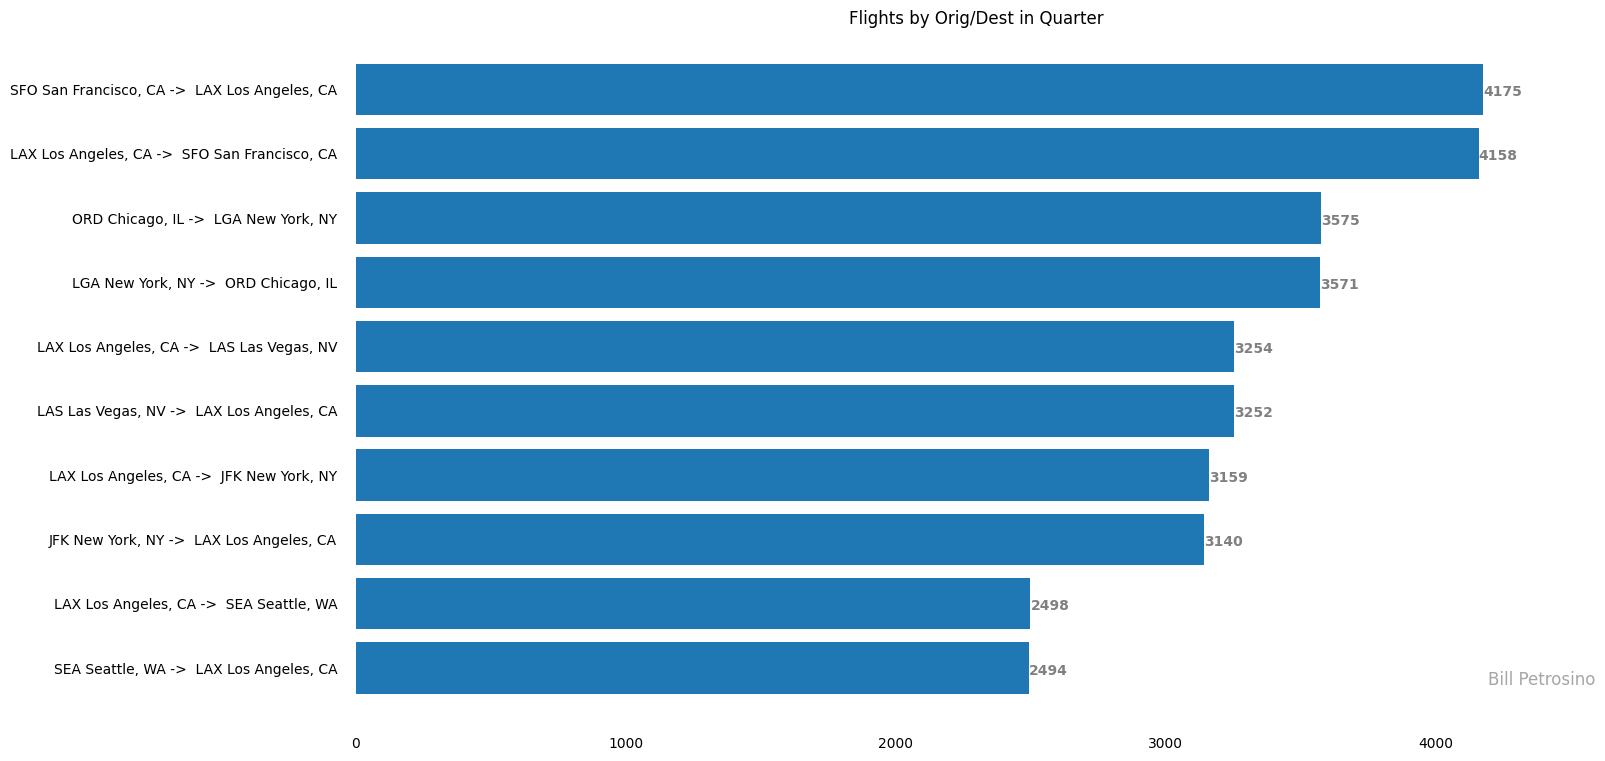

In [ ]:
easy_barchart(flights, 'origin_dest', 'flights', 'Flights by Orig/Dest in Quarter', 'flights', False, 10)

### worst on time departures 
#### seems like planes leaving for the East Coast (LGA/EWR) have issues - but departure from origin is spread out
#### Destination arrival issues seem to show issues with flights from W->E ..... but also show larger airports - of course have higher delays
#### flights between SFO seem to be problematic on both sides..... and that LGA/ORD flight is just always delayed it seems

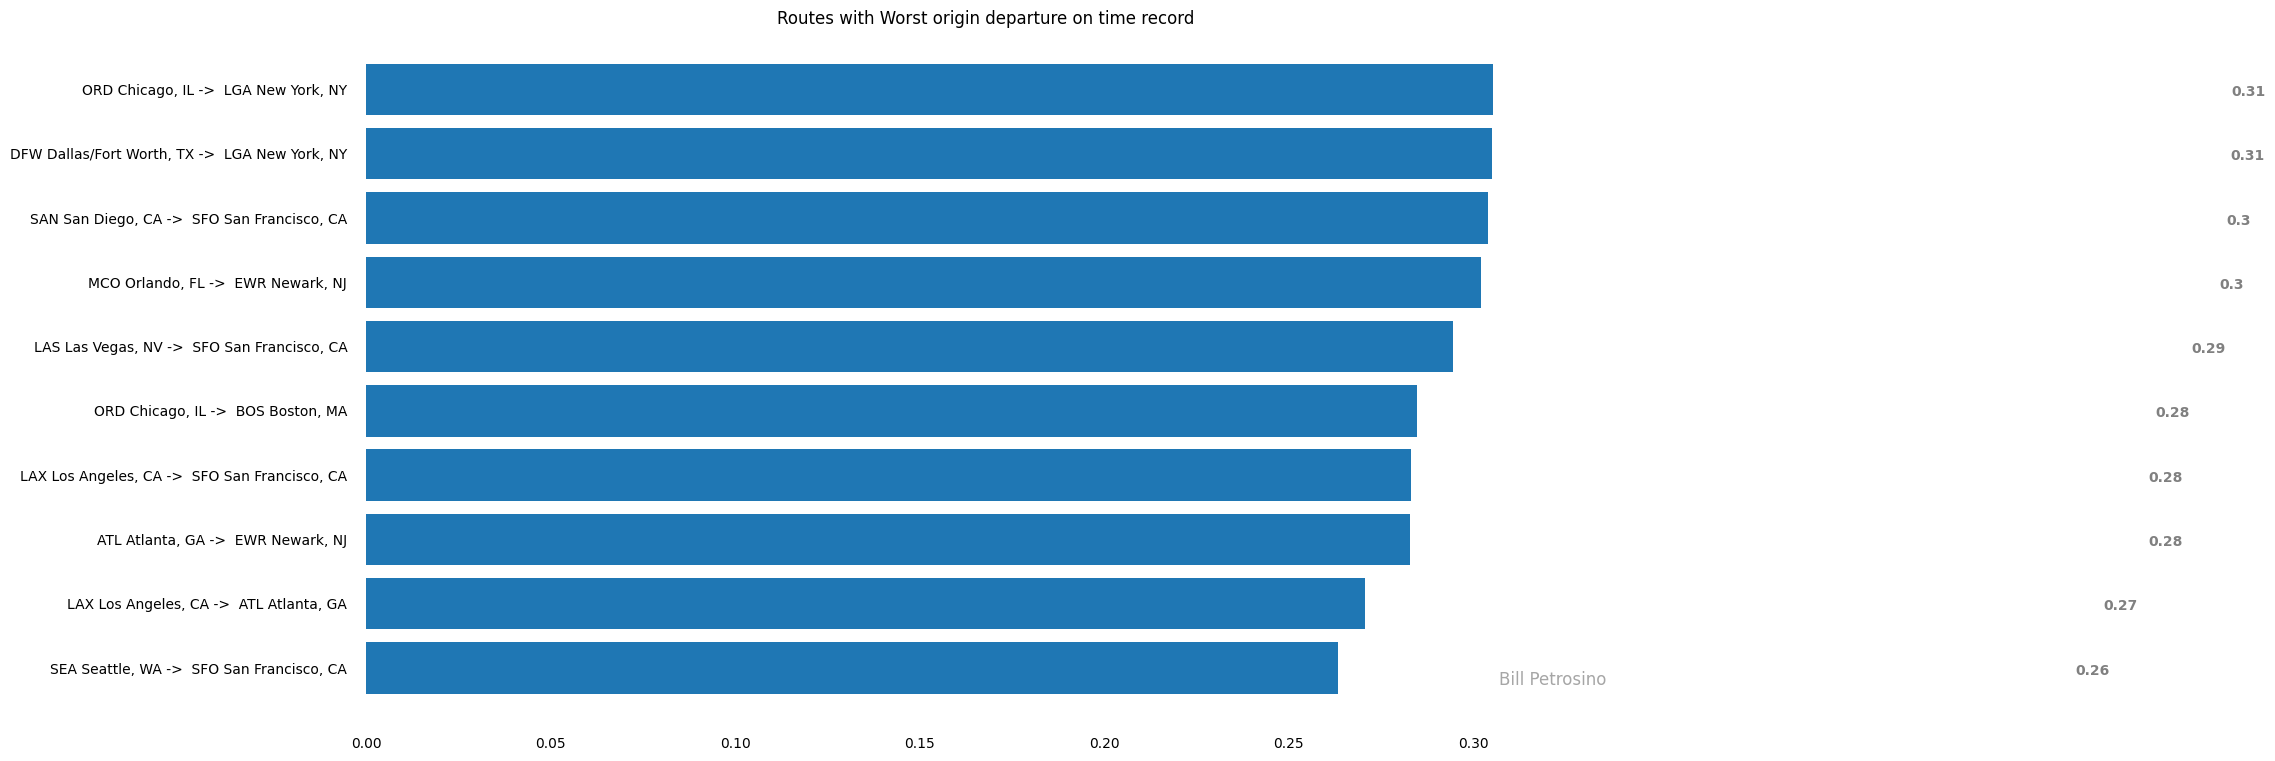

In [ ]:
easy_barchart(flights, 'origin_dest', 'orig_DEP_DELAY>15', 'Routes with Worst origin departure on time record', 'orig_DEP_DELAY>15', False, 10)

### worst DEST arrival track records
#### tends to line up with busier airports in large CITIES

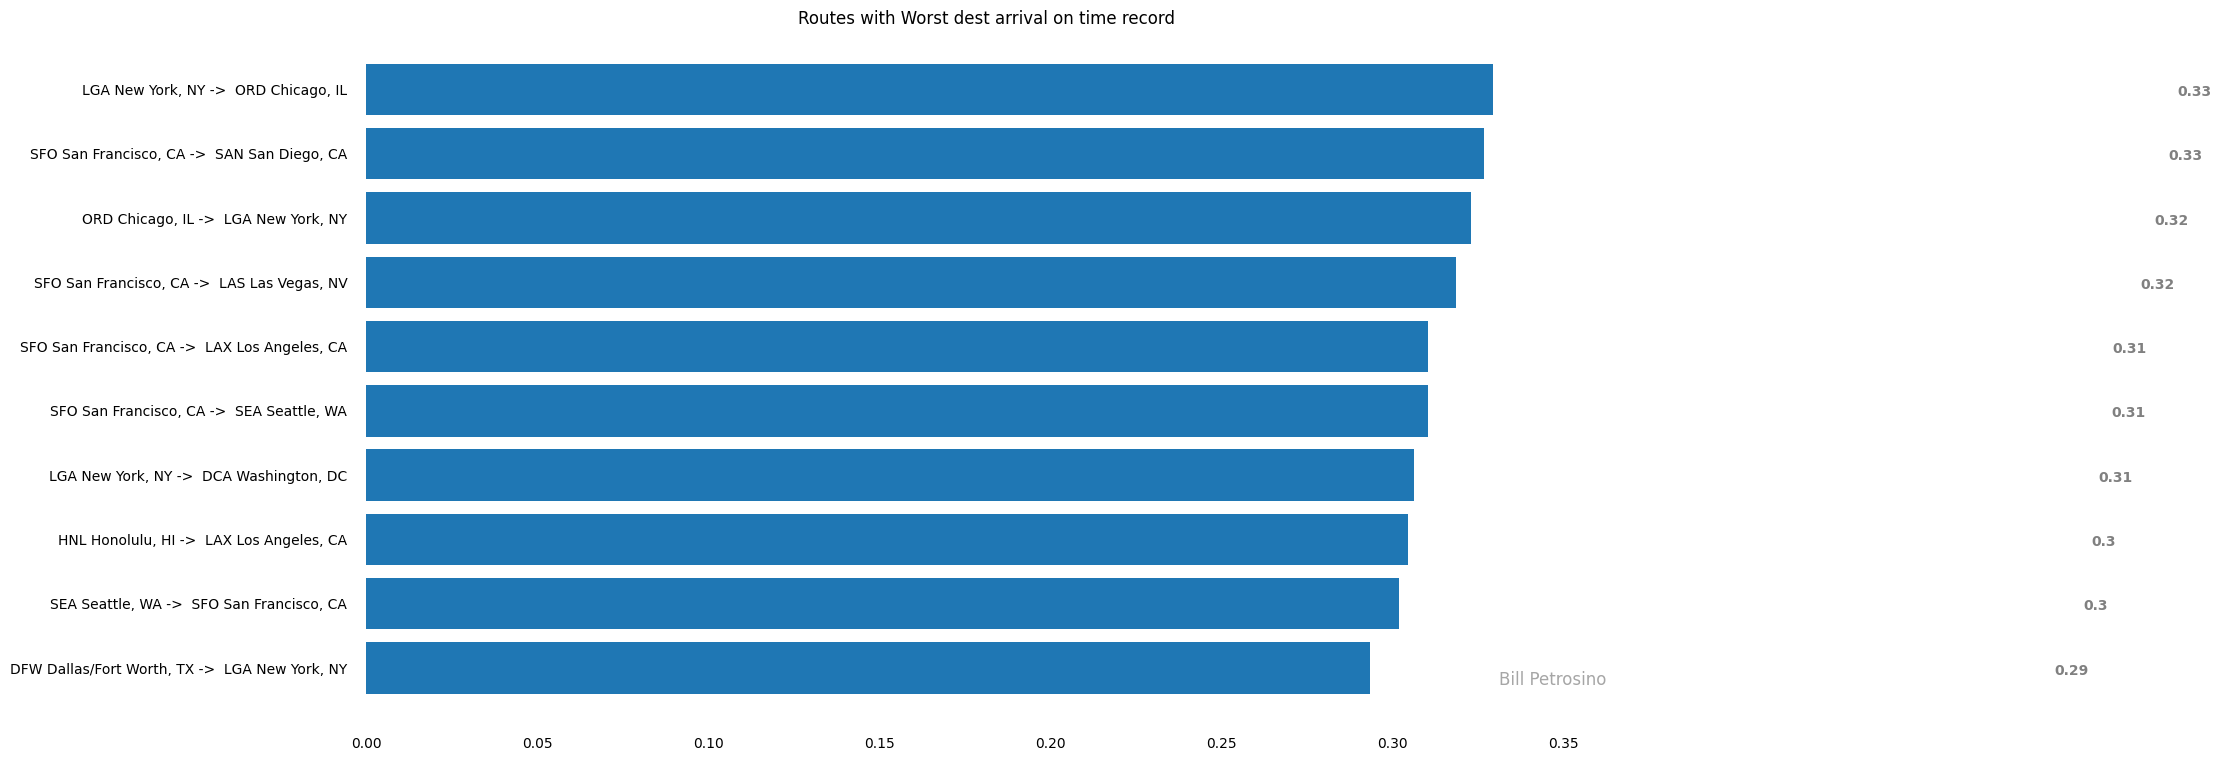

In [ ]:
easy_barchart(flights, 'origin_dest', 'dest_ARR_DELAY>15', 'Routes with Worst dest arrival on time record', 'dest_ARR_DELAY>15', False, 10)

### Best on time departure by route - HI - makes sense - you are island hopping

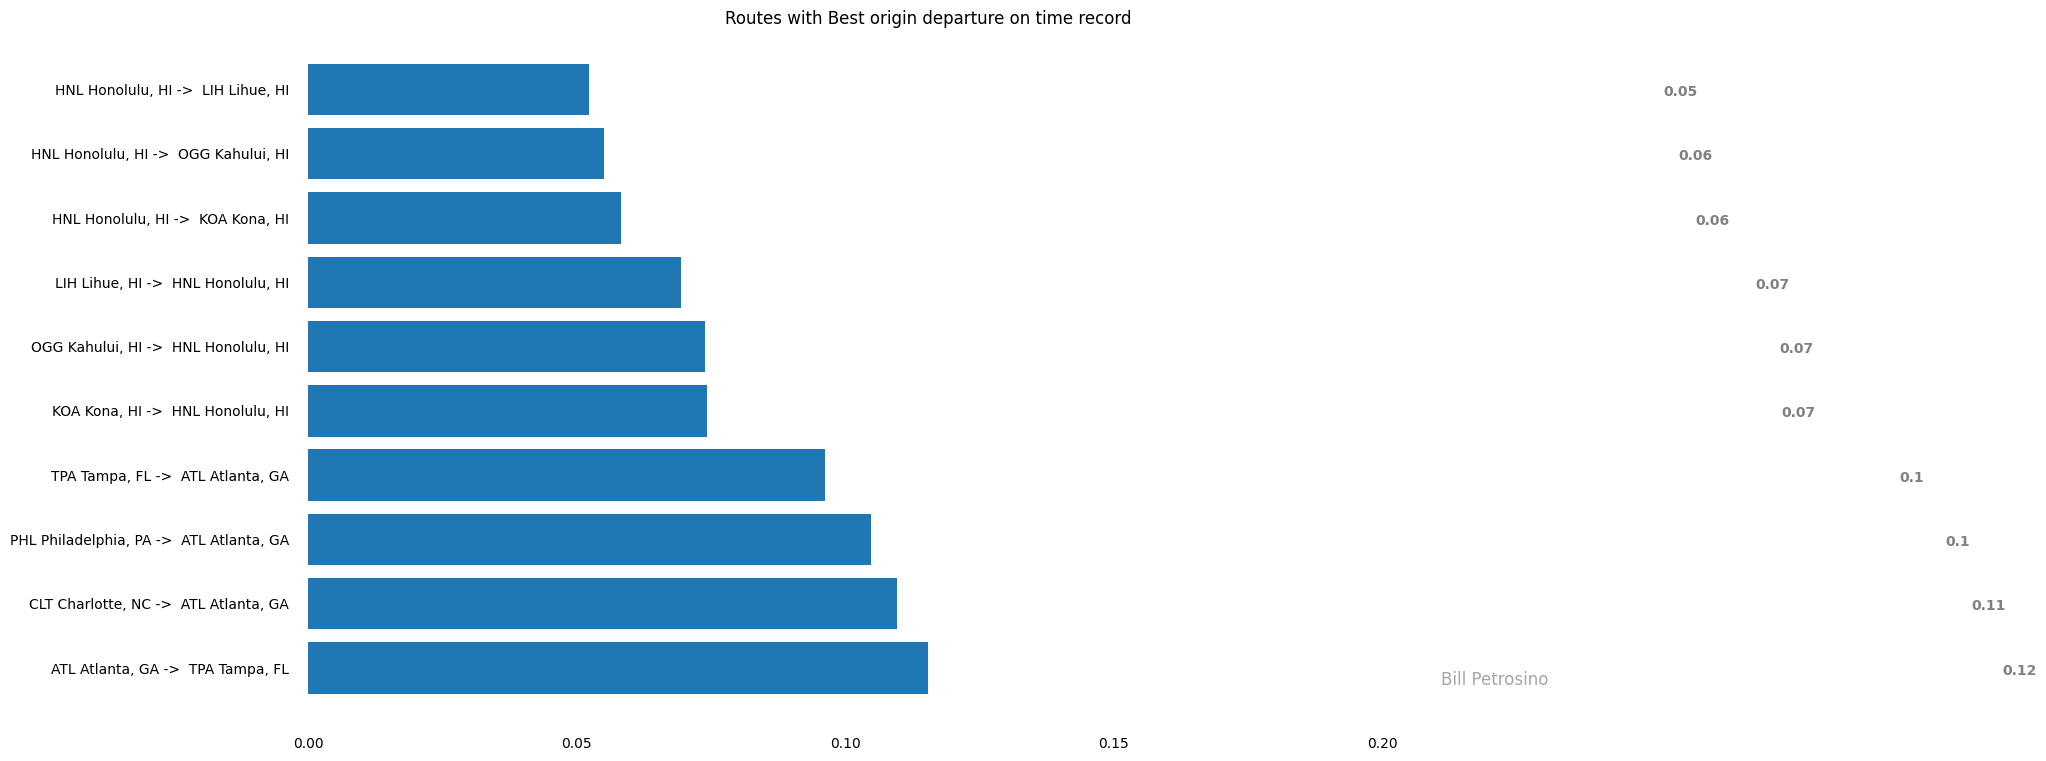

In [ ]:
easy_barchart(flights, 'origin_dest', 'orig_DEP_DELAY>15', 'Routes with Best origin departure on time record', 'orig_DEP_DELAY>15', True, 10)

### best DEST arrival record - and again HI shines here with the top 5 spots. Short haul ATL flights also excel here

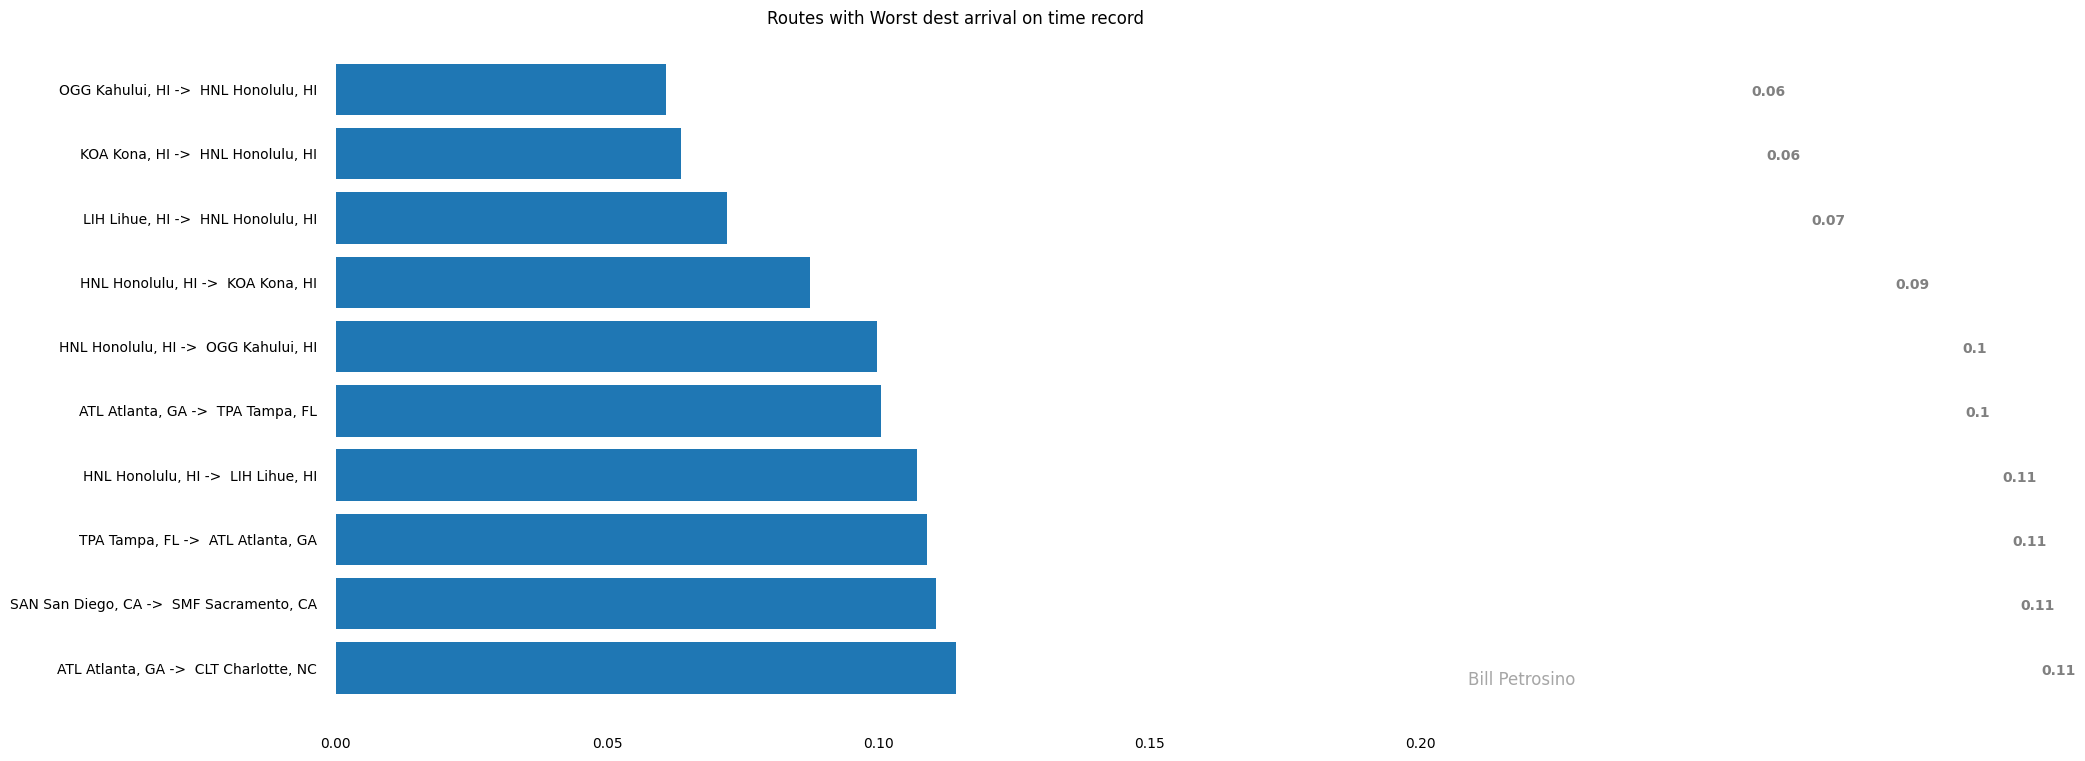

In [ ]:
easy_barchart(flights, 'origin_dest', 'dest_ARR_DELAY>15', 'Routes with Worst dest arrival on time record', 'dest_ARR_DELAY>15', True, 10)

### Alternate answer to #3
#### this shows i would still probably pick PHX - as high volume flights have a short timeline to need to pay off the planes in full


In [ ]:
flights_bill = flights.copy()
flights_bill['years_until_paid'] = flights_bill['flights_until_plane_paid']/(flights_bill['flights_per_qtr']*4)
flights_bill['payoff_timeline'] = flights_bill.groupby('ORIGIN')['years_until_paid'].rank(method = 'dense')
flights_bill = flights_bill.merge(flights_bill.groupby('ORIGIN')['DESTINATION'].size().reset_index().rename(columns = {'DESTINATION':'Destinations'}))
flights_bill = flights_bill[(flights_bill['Destinations']>=5)&(flights_bill['payoff_timeline']<=5)]
flights_bill2 = flights_bill[flights_bill['payoff_timeline']==5]
flights_bill2 = flights_bill2.copy()
flights_bill2['overall_rankings'] = flights_bill2['years_until_paid'].rank(method = 'dense')

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,flights,AIR_TIME,DISTANCE,OCCUPANCY_RATE,avg_arr_delay,avg_dep_delay,...,tot_delay_num,tot_delay_rank,fee_to_rev,fee_rev_rank,composite,composite_rank,years_until_paid,payoff_timeline,Destinations,overall_rankings
21,ATL,"Atlanta, GA",JAX,"Jacksonville, FL",1277,43.0,270,0.65,0.294071,0.353256,...,22.5,7.0,0.387725,21.0,12.738773,7.0,4.482283,5.0,75,1.0
23,CLT,"Charlotte, NC",CHS,"Charleston, SC",785,36.0,168,0.65,1.006710,0.780611,...,41.0,16.0,0.269589,7.0,12.026959,11.0,4.560897,5.0,53,2.0
29,ORD,"Chicago, IL",MSN,"Madison, WI",975,28.0,109,0.66,2.537310,2.092421,...,46.5,18.0,0.322529,5.0,11.432253,4.0,4.811856,5.0,65,3.0
103,DFW,"Dallas/Fort Worth, TX",CLT,"Charlotte, NC",893,114.0,936,0.64,2.010687,1.942984,...,43.0,19.0,0.481354,16.0,11.948135,7.0,6.230337,5.0,51,4.0
119,LGA,"New York, NY",CLE,"Cleveland, OH",1132,74.0,419,0.66,4.421659,3.593106,...,34.0,18.0,0.485571,7.0,11.848557,12.0,6.486726,5.0,28,5.0
143,IAH,"Houston, TX",AUS,"Austin, TX",783,30.0,140,0.67,1.017670,1.037057,...,19.5,8.0,0.354933,5.0,7.235493,3.0,6.951923,5.0,34,6.0
178,MSP,"Minneapolis, MN",FSD,"Sioux Falls, SD",478,37.0,196,0.66,1.531219,1.316757,...,24.5,12.0,0.233168,2.0,6.823317,4.0,7.611702,5.0,24,7.0
188,PHL,"Philadelphia, PA",RIC,"Richmond, VA",503,42.0,198,0.65,1.470469,0.958958,...,19.5,7.0,0.291805,1.0,3.929181,4.0,7.740000,5.0,21,8.0
200,DTW,"Detroit, MI",EWR,"Newark, NJ",930,70.0,488,0.64,7.814375,7.901279,...,51.0,24.0,0.499418,6.0,14.449942,20.0,7.889785,5.0,27,9.0
202,LAX,"Los Angeles, CA",PHX,"Phoenix, AZ",2091,56.0,370,0.65,1.696593,2.181878,...,39.0,17.0,0.667277,6.0,11.766728,13.0,7.900718,5.0,32,10.0


### create some flight chart visuals

In [636]:
flights_bill1 = q3[['ORIGIN', 'ORIGIN_CITY_NAME','DESTINATION', 'DEST_CITY_NAME','DISTANCE']].sort_values(['ORIGIN','DISTANCE']) 
result = pd.merge(flights_bill1, med_lg_airports_US[['IATA_CODE', 'COORDINATES']], how='left', left_on='ORIGIN', right_on='IATA_CODE').drop(columns='IATA_CODE')
result = pd.merge(result, med_lg_airports_US[['IATA_CODE', 'COORDINATES']], how='left', left_on='DESTINATION', right_on='IATA_CODE', suffixes=('_ORIGIN', '_DESTINATION')).drop(columns='IATA_CODE')



In [637]:
result

,ORIGIN,ORIGIN_CITY_NAME,DESTINATION,DEST_CITY_NAME,DISTANCE,COORDINATES_ORIGIN,COORDINATES_DESTINATION
0,PHX,"Phoenix, AZ",SAN,"San Diego, CA",304,"-112.01200103759766, 33.43429946899414","-117.190002441, 32.7336006165"
1,PHX,"Phoenix, AZ",ABQ,"Albuquerque, NM",328,"-112.01200103759766, 33.43429946899414","-106.609001, 35.040199"
2,PHX,"Phoenix, AZ",SMF,"Sacramento, CA",647,"-112.01200103759766, 33.43429946899414","-121.59100341796875, 38.69540023803711"
3,PHX,"Phoenix, AZ",AUS,"Austin, TX",872,"-112.01200103759766, 33.43429946899414","-97.6698989868164, 30.194499969482422"
4,PHX,"Phoenix, AZ",IAH,"Houston, TX",1009,"-112.01200103759766, 33.43429946899414","-95.34140014648438, 29.984399795532227"
5,SLC,"Salt Lake City, UT",BOI,"Boise, ID",290,"-111.97799682617188, 40.78839874267578","-116.223, 43.5644"
6,SLC,"Salt Lake City, UT",PHX,"Phoenix, AZ",507,"-111.97799682617188, 40.78839874267578","-112.01200103759766, 33.43429946899414"
7,SLC,"Salt Lake City, UT",SAN,"San Diego, CA",626,"-111.97799682617188, 40.78839874267578","-117.190002441, 32.7336006165"
8,SLC,"Salt Lake City, UT",PDX,"Portland, OR",630,"-111.97799682617188, 40.78839874267578","-122.5979996, 45.58869934"
9,SLC,"Salt Lake City, UT",ATL,"Atlanta, GA",1590,"-111.97799682617188, 40.78839874267578","-84.428101, 33.6367"


In [643]:
# a script to plot out the flight patterns for phoenix and slc
def plot_flights():
    # Function to generate random colors
    def random_color():
        return f'#{random.randint(0, 0xFFFFFF):06x}'

    # Create a color mapping for each unique origin
    origins = result['ORIGIN'].unique()
    color_map = {origin: random_color() for origin in origins}

    # Create the map
    m = folium.Map(location=[37.0902, -95.7129], zoom_start=4)  # Centered on USA

    for _, row in result.iterrows():
        # Extract coordinates
        origin_coords = list(map(float, row['COORDINATES_ORIGIN'].split(',')))
        destination_coords = list(map(float, row['COORDINATES_DESTINATION'].split(',')))

        # Add a line between origin and destination, colored by origin
        folium.PolyLine(
            locations=[origin_coords[::-1], destination_coords[::-1]],
            color=color_map[row['ORIGIN']],  # Use the color mapped to this origin
            weight=2,
            opacity=0.6,
            tooltip=f"{row['ORIGIN_CITY_NAME']} to {row['DEST_CITY_NAME']} - {row['DISTANCE']} miles"
        ).add_to(m)

        # Add markers for airports (origin in red, destination in green)
        folium.CircleMarker(
            location=origin_coords[::-1],
            radius=3,
            color='red',
            fill=True,
            fill_opacity=0.7,
            popup=row['ORIGIN_CITY_NAME']
        ).add_to(m)

        folium.CircleMarker(
            location=destination_coords[::-1],
            radius=3,
            color='green',
            fill=True,
            fill_opacity=0.7,
            popup=row['DEST_CITY_NAME']
        ).add_to(m)

    # Save the map
    m.save("flight_patterns.html")

    # Open the map in a web browser
    import webbrowser
    webbrowser.open('flight_patterns.html')
    display(m)

In [644]:
plot_flights()